In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T23:19:42.415564+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.4.2
seaborn: 0.13.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.811981201171875e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.11929655075073242}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.005709648132324219}
!!! {"init_...": 0.0005550384521484375}
!!! {"ete3Tree": 0.5474452972412109}
!!! {"GenomeTree_hierarchical": 0.002159595489501953}
!!! {"mutateBranchETEhierarchy": 0.09137511253356934}
!!! {"write_genome_short": 0.04511666297912598}


  4%|▍         | 8/193 [00:01<00:22,  8.17it/s]

!!! {"writeGenomeNoIndels": 0.16862106323242188}
!!! {"pl.DataFrame": 0.04434323310852051}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.9105381965637207}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.018234968185424805}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033562183380126953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001499652862548828}
!!! {"init_...": 0.0004649162292480469}
!!! {"ete3Tree": 7.605552673339844e-05}
!!! {"GenomeTree_hierarchical": 0.0020346641540527344}
!!! {"mutateBranchETEhierarchy": 1.3828277587890625e-05}
!!! {"write_genome_short": 0.00064516067504

  8%|▊         | 15/193 [00:01<00:11, 16.01it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7179718017578125e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035698413848876953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.918212890625e-05}
!!! {"init_...": 0.0004322528839111328}
!!! {"ete3Tree": 0.0007500648498535156}
!!! {"GenomeTree_hierarchical": 0.0019481182098388672}
!!! {"mutateBranchETEhierarchy": 0.000148773193359375}
!!! {"write_genome_short": 0.0003600120544433594}
!!! {"writeGenomeNoIndels": 0.00023937225341796875}
!!! {"pl.DataFrame": 0.00011777877807617188}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005615711212158203}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000196

 13%|█▎        | 26/193 [00:01<00:06, 25.95it/s]

!!! {"phastSimRun": 0.00010061264038085938}
!!! {"init_...": 0.0005679130554199219}
!!! {"ete3Tree": 0.019342899322509766}
!!! {"GenomeTree_hierarchical": 0.0018868446350097656}
!!! {"mutateBranchETEhierarchy": 0.004491567611694336}
!!! {"write_genome_short": 0.0023450851440429688}
!!! {"writeGenomeNoIndels": 0.0077173709869384766}
!!! {"pl.DataFrame": 0.0014128684997558594}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03992176055908203}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008349418640136719}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003101825714111328}
enter log_context_duration for _do_r

 21%|██        | 40/193 [00:01<00:03, 38.97it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.6702880859375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003437042236328125}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.965896606445312e-05}
!!! {"init_...": 0.00044155120849609375}
!!! {"ete3Tree": 5.7220458984375e-05}
!!! {"GenomeTree_hierarchical": 0.0020551681518554688}
!!! {"mutateBranchETEhierarchy": 9.298324584960938e-06}
!!! {"write_genome_short": 6.699562072753906e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.699562072753906e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004423379898071289}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019025802

 24%|██▍       | 46/193 [00:02<00:03, 39.58it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.6464462280273438e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00865316390991211}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010371208190917969}
!!! {"init_...": 0.0004487037658691406}
!!! {"ete3Tree": 0.0212860107421875}
!!! {"GenomeTree_hierarchical": 0.001971721649169922}
!!! {"mutateBranchETEhierarchy": 0.005105495452880859}
!!! {"write_genome_short": 0.0023992061614990234}
!!! {"writeGenomeNoIndels": 0.008500337600708008}
!!! {"pl.DataFrame": 0.0015826225280761719}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.042990684509277344}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008826255

 31%|███       | 60/193 [00:02<00:02, 50.10it/s]

!!! {"phastSimRun": 9.870529174804688e-05}
!!! {"init_...": 0.0005631446838378906}
!!! {"ete3Tree": 5.793571472167969e-05}
!!! {"GenomeTree_hierarchical": 0.0020492076873779297}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 6.723403930664062e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.723403930664062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004857540130615234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001704692840576172}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003130674362182617}
enter log_context_duration for _do_

 38%|███▊      | 74/193 [00:02<00:02, 56.14it/s]

!!! {"write_genome_short": 0.0005161762237548828}
!!! {"writeGenomeNoIndels": 1.0251998901367188e-05}
!!! {"pl.DataFrame": 9.393692016601562e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005054473876953125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019979476928710938}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=16, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031545162200927734}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.72747802734375e-05}
!!! {"init_...": 0.00044274330139160156}
!!! {"ete3Tree": 0.00014543533325195312}
!!! {"GenomeTree_hierarchical": 0.002783060073852539}
!!! {"mutateBranchETEhierarchy": 2.7894

 41%|████▏     | 80/193 [00:02<00:03, 28.53it/s]

!!! {"mutateBranchETEhierarchy": 0.35268425941467285}
!!! {"write_genome_short": 0.001979351043701172}
!!! {"writeGenomeNoIndels": 0.0029044151306152344}
!!! {"pl.DataFrame": 0.0006875991821289062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.370222806930542}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005738735198974609}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004397869110107422}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014328956604003906}
!!! {"init_...": 0.0004956722259521484}
!!! {"ete3Tree": 0.0040283203125}
!!! {"GenomeTree_hierarchical": 0.0020432472229003

 47%|████▋     | 90/193 [00:03<00:03, 30.39it/s]

!!! {"phastSimRun": 0.00010371208190917969}
!!! {"init_...": 0.0005681514739990234}
!!! {"ete3Tree": 5.841255187988281e-05}
!!! {"GenomeTree_hierarchical": 0.002463817596435547}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 7.724761962890625e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 7.271766662597656e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005372762680053711}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018644332885742188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=11, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003106832504272461}
enter log_context_duration for

 53%|█████▎    | 102/193 [00:03<00:02, 38.08it/s]

!!! {"write_genome_short": 0.0005059242248535156}
!!! {"writeGenomeNoIndels": 3.814697265625e-05}
!!! {"pl.DataFrame": 0.00010752677917480469}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00498652458190918}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003044605255126953}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003143787384033203}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.846687316894531e-05}
!!! {"init_...": 0.0004489421844482422}
!!! {"ete3Tree": 5.841255187988281e-05}
!!! {"GenomeTree_hierarchical": 0.002704143524169922}
!!! {"mutateBranchETEhierarchy": 9.298324584960

 56%|█████▋    | 109/193 [00:03<00:01, 43.20it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.6464462280273438e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034770965576171875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010395050048828125}
!!! {"init_...": 0.0004124641418457031}
!!! {"ete3Tree": 5.7220458984375e-05}
!!! {"GenomeTree_hierarchical": 0.0020465850830078125}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 6.723403930664062e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 8.654594421386719e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0044248104095458984}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001814

 63%|██████▎   | 122/193 [00:03<00:01, 49.38it/s]

!!! {"write_genome_short": 0.0016169548034667969}
!!! {"writeGenomeNoIndels": 0.0012767314910888672}
!!! {"pl.DataFrame": 0.0002887248992919922}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011245965957641602}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002968311309814453}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003110647201538086}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001201629638671875}
!!! {"init_...": 0.00041174888610839844}
!!! {"ete3Tree": 5.7697296142578125e-05}
!!! {"GenomeTree_hierarchical": 0.002055644989013672}
!!! {"mutateBranchETEhierarchy": 9.775161

 70%|██████▉   | 135/193 [00:04<00:01, 53.23it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004579782485961914}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013303756713867188}
!!! {"init_...": 0.0005538463592529297}
!!! {"ete3Tree": 9.202957153320312e-05}
!!! {"GenomeTree_hierarchical": 0.0032052993774414062}
!!! {"mutateBranchETEhierarchy": 1.2874603271484375e-05}
!!! {"write_genome_short": 8.034706115722656e-05}
!!! {"writeGenomeNoIndels": 9.298324584960938e-06}
!!! {"pl.DataFrame": 8.606910705566406e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00646519660949707}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002148151397705078}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.8371810913085938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_

 74%|███████▎  | 142/193 [00:04<00:00, 56.30it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031783580780029297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011539459228515625}
!!! {"init_...": 0.00041174888610839844}
!!! {"ete3Tree": 5.7697296142578125e-05}
!!! {"GenomeTree_hierarchical": 0.0020847320556640625}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 7.033348083496094e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.67572021484375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004454374313354492}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020

 80%|████████  | 155/193 [00:04<00:00, 45.50it/s]

!!! {"ete3Tree": 0.025026321411132812}
!!! {"GenomeTree_hierarchical": 0.0019969940185546875}
!!! {"mutateBranchETEhierarchy": 0.005705356597900391}
!!! {"write_genome_short": 0.0031685829162597656}
!!! {"writeGenomeNoIndels": 0.009497880935668945}
!!! {"pl.DataFrame": 0.0017485618591308594}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04932689666748047}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0010173320770263672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031816959381103516}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013375282287597656}
!!! {"init_...": 0.000433206

 83%|████████▎ | 160/193 [00:05<00:02, 13.87it/s]

!!! {"GenomeTree_hierarchical": 0.3209342956542969}
!!! {"mutateBranchETEhierarchy": 0.04349040985107422}
!!! {"write_genome_short": 0.020535707473754883}
!!! {"writeGenomeNoIndels": 0.06986355781555176}
!!! {"pl.DataFrame": 0.014118432998657227}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.6470253467559814}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005994081497192383}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 4.00543212890625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003223896026611328}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013637542724609375}
!!! {"init_...": 0.0004851818084716797}
!!! {"ete3Tree": 8.416175842285156e-05}

 85%|████████▌ | 165/193 [00:05<00:01, 16.90it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004984617233276367}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010061264038085938}
!!! {"init_...": 0.0004112720489501953}
!!! {"ete3Tree": 0.0036144256591796875}
!!! {"GenomeTree_hierarchical": 0.0026619434356689453}
!!! {"mutateBranchETEhierarchy": 0.0008578300476074219}
!!! {"write_genome_short": 0.0005590915679931641}
!!! {"writeGenomeNoIndels": 0.001463174819946289}
!!! {"pl.DataFrame": 0.00032973289489746094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011619091033935547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002961158752441406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_a

 92%|█████████▏| 178/193 [00:06<00:00, 24.24it/s]

!!! {"ete3Tree": 0.0649714469909668}
!!! {"GenomeTree_hierarchical": 0.0019881725311279297}
!!! {"mutateBranchETEhierarchy": 0.01492619514465332}
!!! {"write_genome_short": 0.0076181888580322266}
!!! {"writeGenomeNoIndels": 0.025334596633911133}
!!! {"pl.DataFrame": 0.004805088043212891}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12196922302246094}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00238800048828125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003228902816772461}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001342296600341797}
!!! {"init_...": 0.0004875659942626953

 95%|█████████▍| 183/193 [00:06<00:00, 27.76it/s]

!!! {"ete3Tree": 0.00997161865234375}
!!! {"GenomeTree_hierarchical": 0.0019884109497070312}
!!! {"mutateBranchETEhierarchy": 0.0021741390228271484}
!!! {"write_genome_short": 0.0019106864929199219}
!!! {"writeGenomeNoIndels": 0.003632783889770508}
!!! {"pl.DataFrame": 0.0007436275482177734}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.022585391998291016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004947185516357422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031185150146484375}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010085105895996094}
!!! {"init_...": 0.00041127

100%|██████████| 193/193 [00:06<00:00, 29.62it/s]

!!! {"phastSimRun": 0.00011539459228515625}
!!! {"init_...": 0.0005548000335693359}
!!! {"ete3Tree": 6.341934204101562e-05}
!!! {"GenomeTree_hierarchical": 0.0020983219146728516}
!!! {"mutateBranchETEhierarchy": 1.0728836059570312e-05}
!!! {"write_genome_short": 6.818771362304688e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.486343383789062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005028247833251953}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019979476928710938}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031685829162597656}
enter log_context_duration for 

exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2667560577392578}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03365778923034668}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0032770633697509766}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033246755599975586}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.007544755935668945}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0034928321838378906}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03287649154663086}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003057718276977539}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 21.85it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03334975242614746}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003370046615600586}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0034646987915039062}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03300786018371582}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003496408462524414}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0035440921783447266}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches


100%|██████████| 7/7 [00:00<00:00, 23.33it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03326225280761719}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002321481704711914}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0034749507904052734}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03310585021972656}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0037326812744140625}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0015113353729248047}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for misma

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.24868440628051758}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.18643593788146973}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 4086/4086 [00:25<00:00, 160.57it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 27.051612377166748}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 594.28it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 136.05057382583618}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.07295632362365723}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 196.6795139312744}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.00990748405456543}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003151893615722656}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0003859996795654297}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004038810729980469}
ancestral_se


100%|██████████| 368/368 [00:00<00:00, 299244.64it/s]

process mutations:   0%|          | 1/368 [00:00<01:11,  5.14it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:15<11:50,  1.97s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.9s



process mutations:  13%|█▎        | 48/368 [00:55<05:56,  1.11s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.0min



process mutations:  24%|██▍       | 88/368 [01:37<05:03,  1.08s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.7min



process mutations:  35%|███▍      | 128/368 [02:20<04:19,  1.08s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.5min



process mutations:  46%|████▌     | 168/368 [03:02<03:32,  1.06s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.2min



process mutations:  57%|█████▋    | 208/368 [03:43<02:49,  1.06s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.9min



process mutations:  67%|██████▋   | 248/368 [04:26<02:06,  1.06s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.6min



process mutations:  78%|███████▊  | 288/368 [05:08<01:24,  1.06s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.4min



process mutations:  89%|████████▉ | 328/368 [05:51<00:42,  1.07s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.0min



process mutations: 100%|██████████| 368/368 [06:33<00:00,  1.07s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.6min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.7min finished


process replicate: 100%|██████████| 1/1 [10:03<00:00, 603.64s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.0800931453704834}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 110
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '02332255-ce81-848a-a24e-6164f92eedab', '02332255-ce81-848a-a24e-6164f92eedab', '02332255-ce81-848a-a24e-6164f9
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


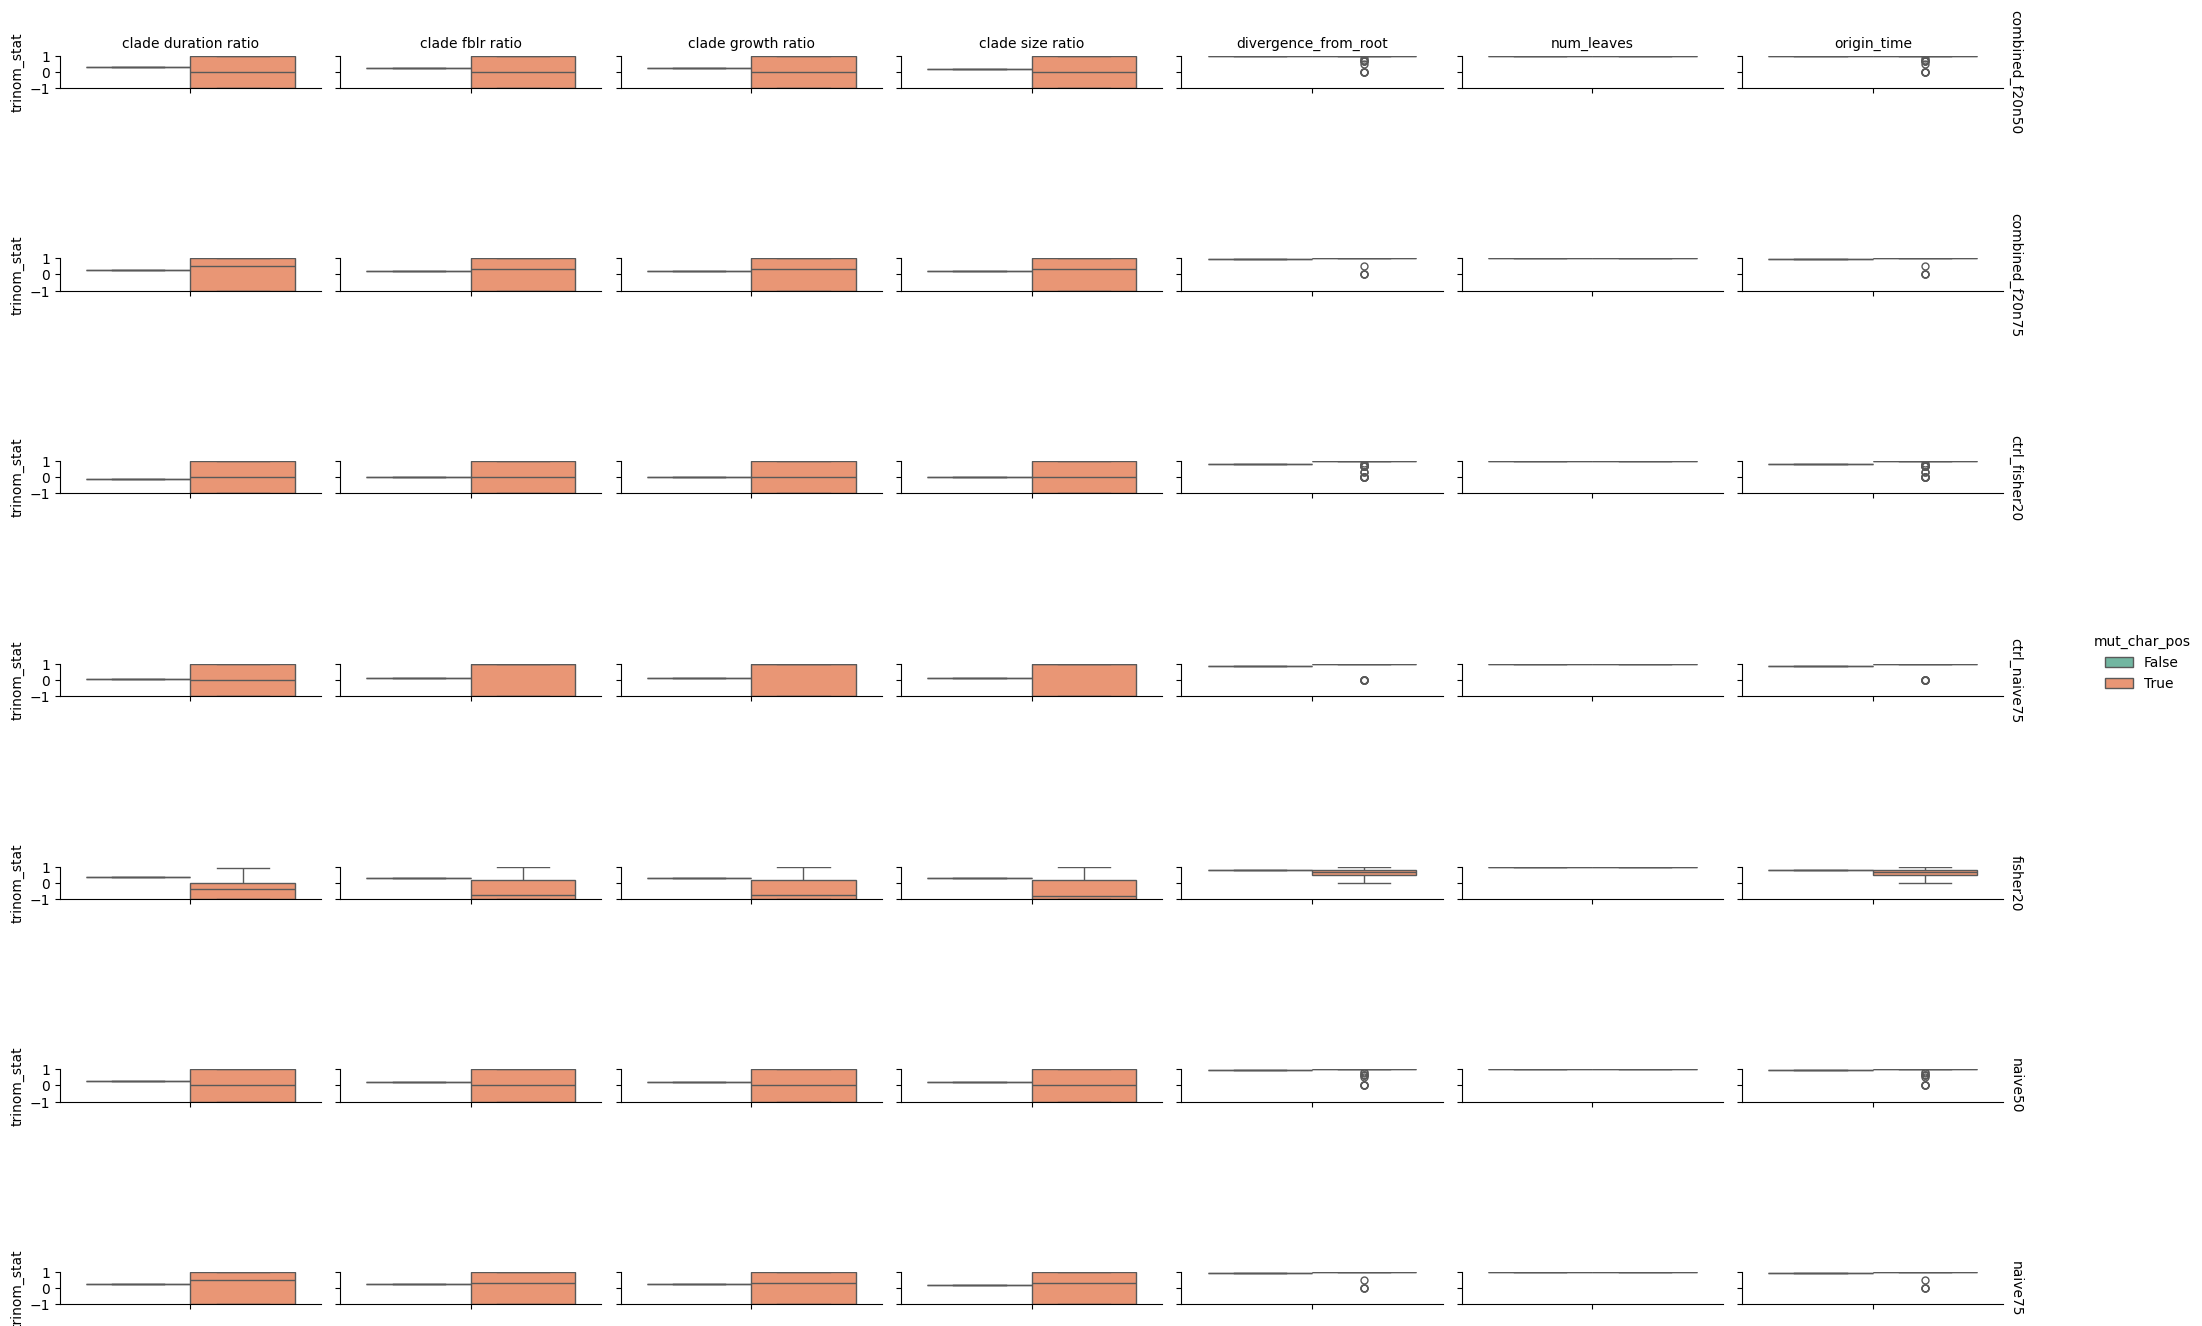

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


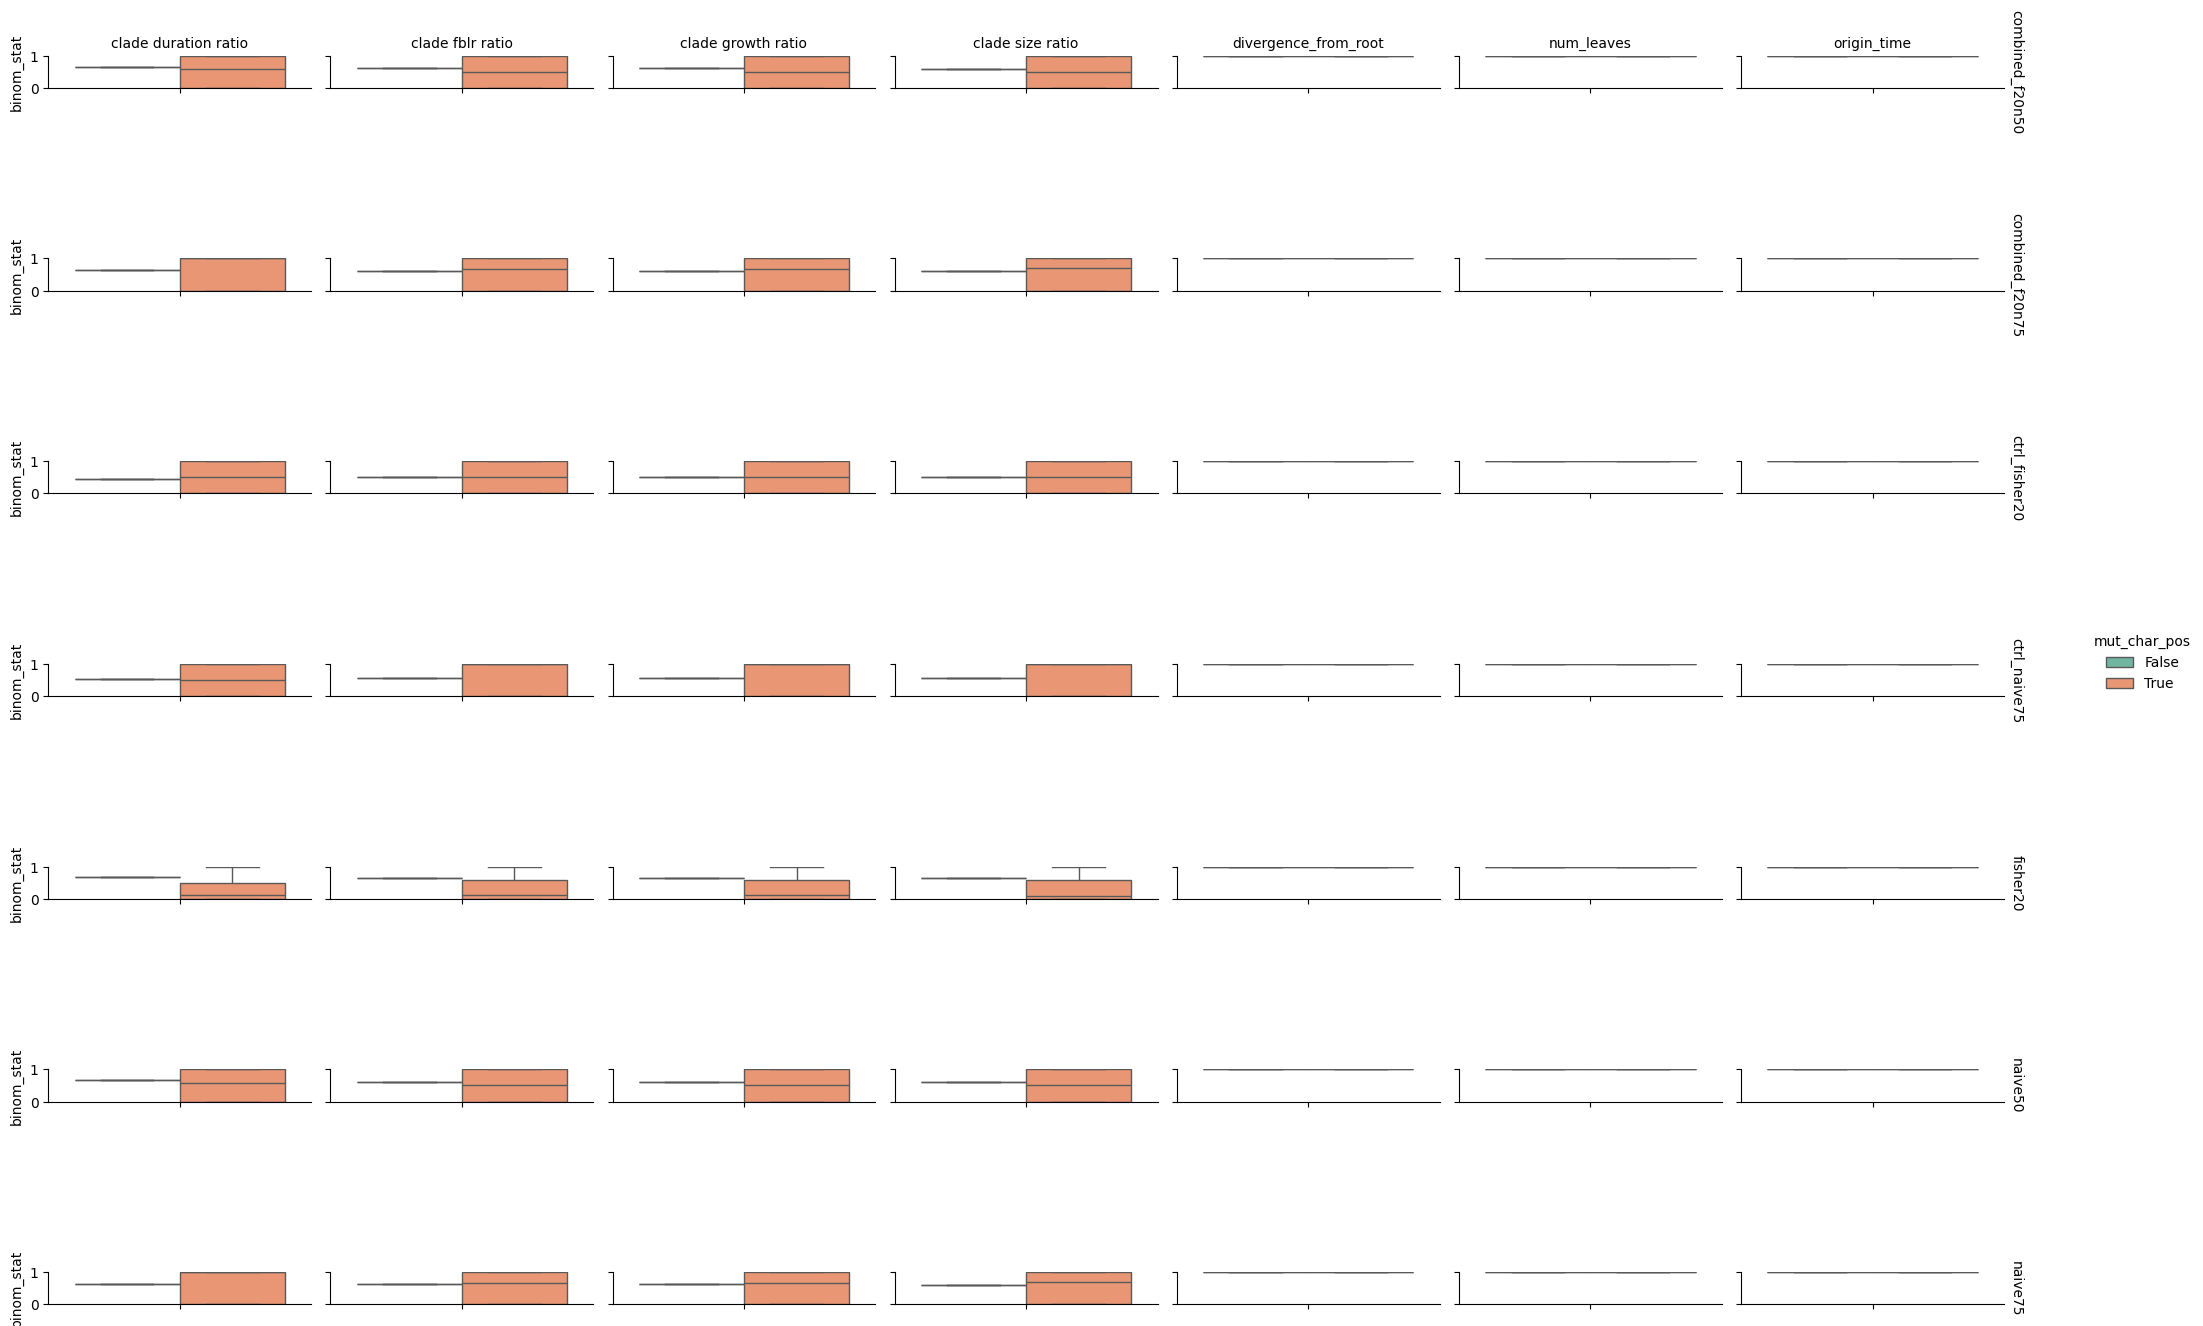

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


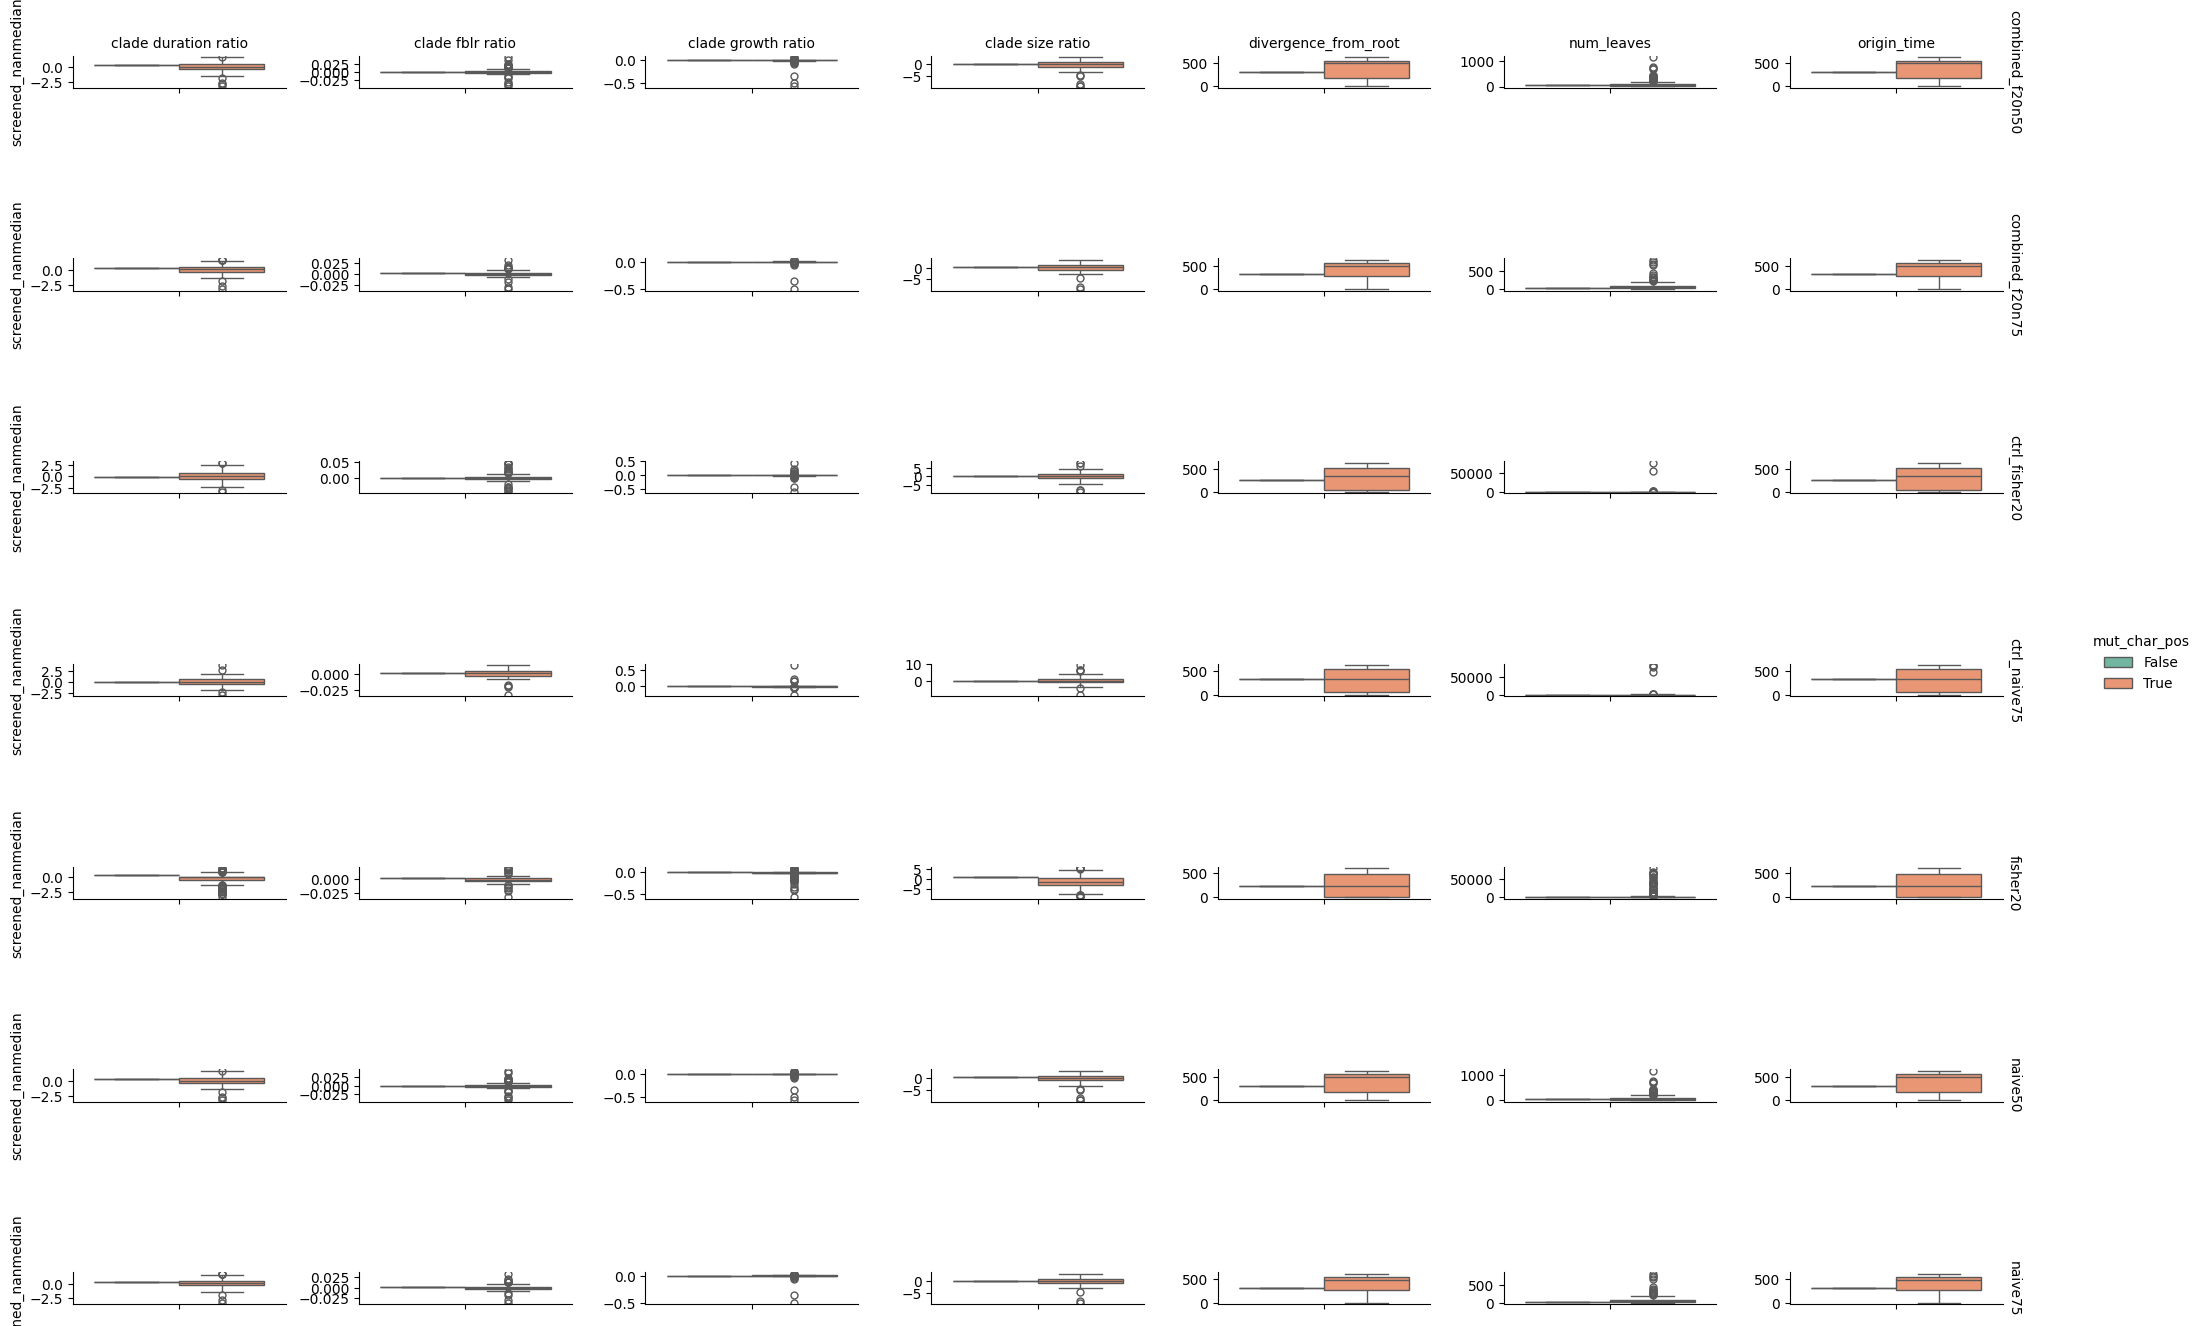

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


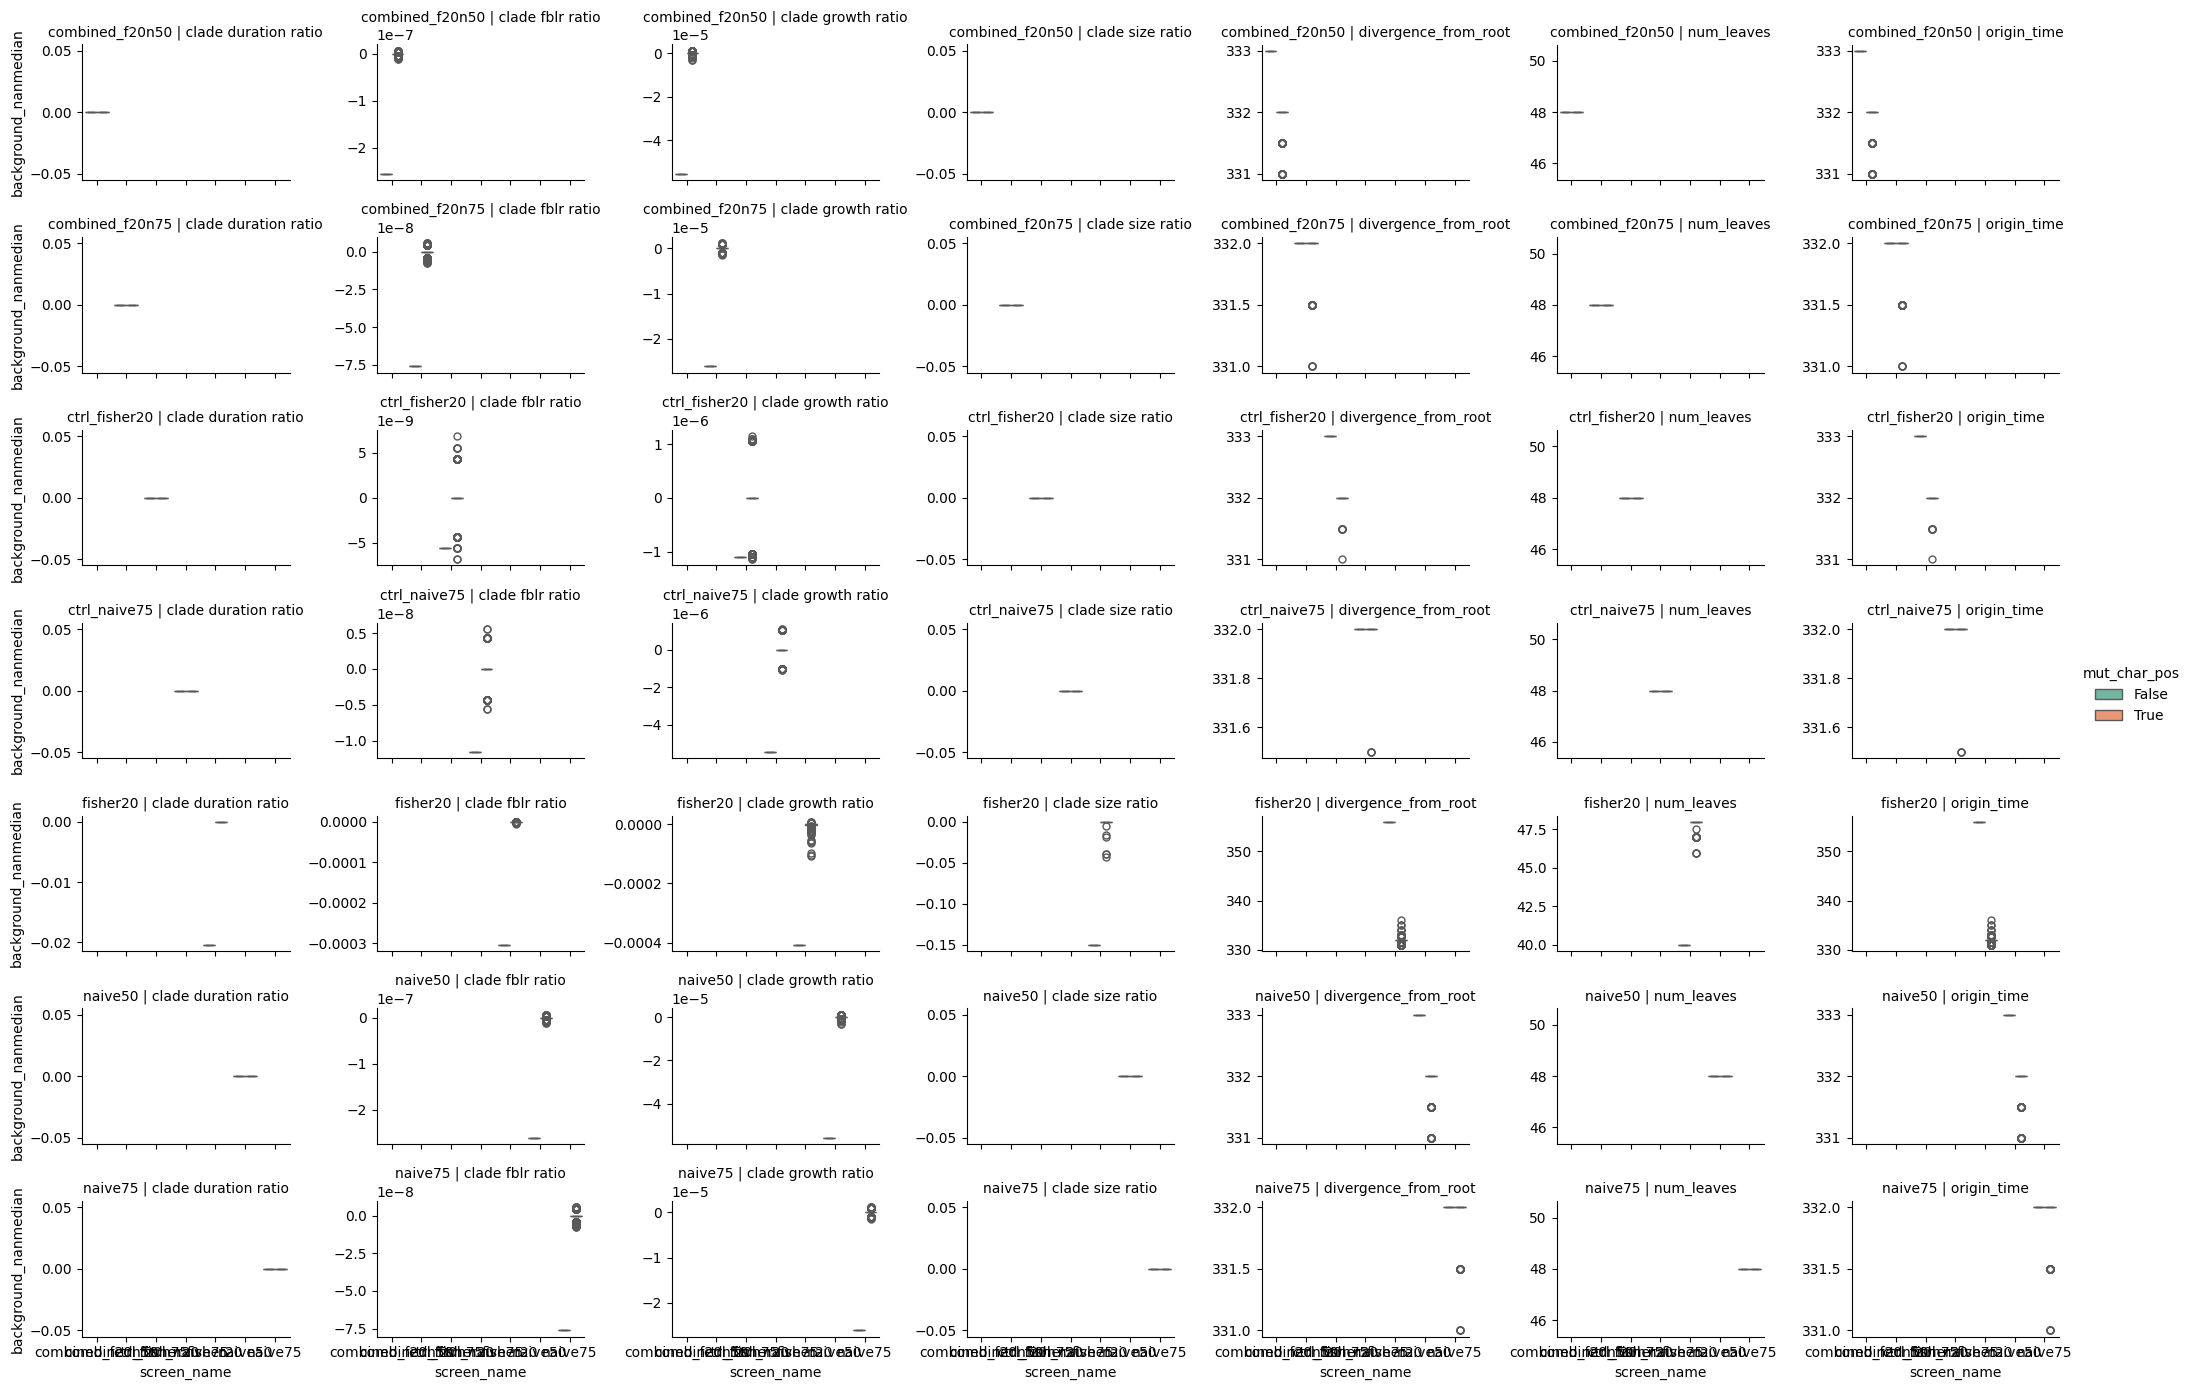

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
